In [ ]:
"""
    Base code attributed to Andrej Karpathy at: https://github.com/karpathy/micrograd/blob/master/demo.ipynb
    Updated to use minigrad TMLP model, using Tensors rather than Value

""" 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from minigrad.engine import Tensor
from minigrad.nn import TLayer, TMLP

In [3]:
np.random.seed(42)
random.seed(42)

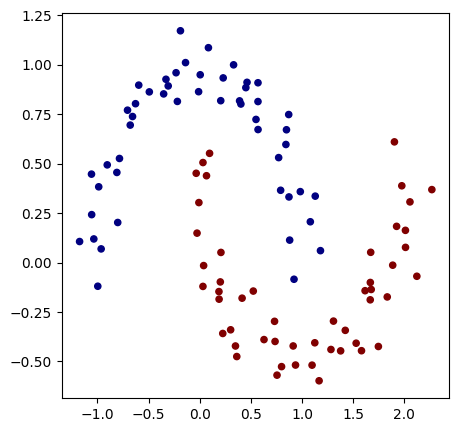

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
model = TMLP(2, [16,16,1])
print(model)
print(f"Num parameters: {len(model.parameters())}")

Num parameters: 6


In [6]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]

    inputs = [Tensor(np.array(xrow).reshape(2,1)) for xrow in Xb]
        
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4

    reg_loss = alpha * sum(p*p for p in model.ind_parameters())
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Tensor(data=[[1.84194697]] shape=(1, 1) grad=[[0.]] _op=scalar+) [[0.5]]


In [7]:
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)`
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss [[1.84194697]], accuracy [[50.]]%
step 1 loss [[2.34341857]], accuracy [[50.]]%
step 2 loss [[1.0819031]], accuracy [[59.]]%
step 3 loss [[0.74552704]], accuracy [[71.]]%
step 4 loss [[0.34308222]], accuracy [[84.]]%
step 5 loss [[0.32299702]], accuracy [[84.]]%
step 6 loss [[0.30557712]], accuracy [[84.]]%
step 7 loss [[0.28704261]], accuracy [[86.]]%
step 8 loss [[0.27479863]], accuracy [[86.]]%
step 9 loss [[0.26296615]], accuracy [[87.]]%
step 10 loss [[0.25189229]], accuracy [[87.]]%
step 11 loss [[0.24045434]], accuracy [[90.]]%
step 12 loss [[0.23141152]], accuracy [[90.]]%
step 13 loss [[0.22513536]], accuracy [[91.]]%
step 14 loss [[0.21988281]], accuracy [[91.]]%
step 15 loss [[0.21550708]], accuracy [[91.]]%
step 16 loss [[0.21226396]], accuracy [[92.]]%
step 17 loss [[0.20585874]], accuracy [[92.]]%
step 18 loss [[0.20204708]], accuracy [[92.]]%
step 19 loss [[0.19564204]], accuracy [[92.]]%
step 20 loss [[0.19389758]], accuracy [[92.]]%
step 21 loss [[0.1883806

(-1.5978882018302847, 2.1521117981697153)

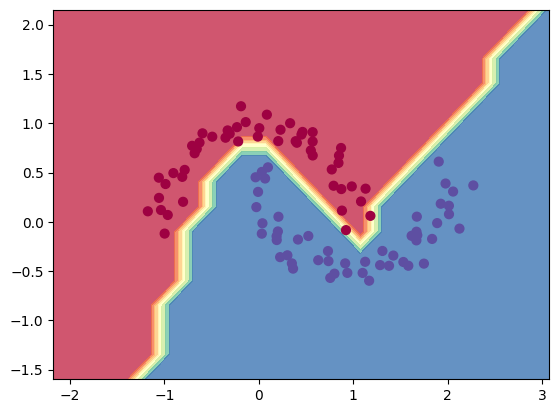

In [10]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [Tensor(np.array(xrow).reshape(2,1)) for xrow in Xmesh]

scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
